# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
#!pip install tensorflow
#!pip install keras

Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
len(np.unique(y_test))

10

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
2**8 # niveles de gris

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

C:\Users\hegoi\AppData\Local\Temp\ipykernel_14932\3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


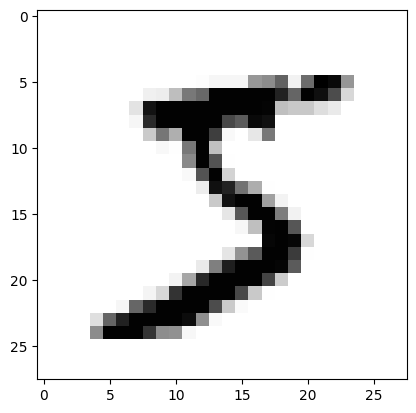

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [9]:
np.max(X_train)

np.uint8(255)

In [10]:
0/255

0.0

In [11]:
128/255

0.5019607843137255

In [12]:
255/255

1.0

In [13]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [14]:
np.mean(X_train)

np.float32(0.13066062)

In [15]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [17]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [19]:
28*28

784

In [20]:
X_train.shape

(50000, 28, 28)

In [21]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

C:\Users\hegoi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [23]:
print(model.layers[0])

<Flatten name=flatten_1, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [24]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.05990898, -0.03209546,  0.06645767, ...,  0.05303001,
        -0.06450409,  0.01632438],
       [ 0.02989584, -0.05757445,  0.03892187, ..., -0.06666786,
        -0.02907685, -0.00288201],
       [-0.01895948,  0.01586968,  0.04010396, ...,  0.04957402,
        -0.02879613,  0.06465437],
       ...,
       [-0.06695593,  0.05688132, -0.02708915, ..., -0.00086068,
         0.03239603,  0.01111812],
       [ 0.03703769,  0.06960662, -0.06236964, ..., -0.04750951,
         0.06091033, -0.06023098],
       [ 0.01119491, -0.01103284,  0.01767861, ..., -0.02610354,
        -0.05917135,  0.00861607]], dtype=float32)

In [26]:
len(weights)

784

In [27]:
len(weights[0])

300

In [28]:
28*28

784

In [29]:
300*784

235200

In [30]:
weights.size

235200

In [31]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [32]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [33]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [34]:
# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
784 * 300 + 300

235500

In [36]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [37]:
300 * 784 + 300

235500

In [38]:
300 * 100 + 100

30100

In [39]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [40]:
X_train.shape

(50000, 28, 28)

In [41]:
50000/128

390.625

In [42]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4777 - loss: 1.8037 - val_accuracy: 0.8595 - val_loss: 0.6341
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8608 - loss: 0.5849 - val_accuracy: 0.8968 - val_loss: 0.4044
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.4186 - val_accuracy: 0.9070 - val_loss: 0.3395
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9025 - loss: 0.3589 - val_accuracy: 0.9136 - val_loss: 0.3090
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9108 - loss: 0.3223 - val_accuracy: 0.9190 - val_loss: 0.2856
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9136 - loss: 0.3088 - val_accuracy: 0.9221 - val_loss: 0.2717
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9171 - loss: 0.2914 - val_accuracy: 0.9268 - val_loss: 0.2578
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9244 - loss: 0.2705 - val_accuracy: 0.9296 - val_

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [43]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0851 - val_accuracy: 0.9702 - val_loss: 0.1067
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0806 - val_accuracy: 0.9713 - val_loss: 0.1031
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9787 - loss: 0.0800 - val_accuracy: 0.9729 - val_loss: 0.0997
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9795 - loss: 0.0752 - val_accuracy: 0.9726 - val_loss: 0.1002
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9799 - loss: 0.0757 - val_accuracy: 0.9730 - val_loss: 0.0977
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9806 - loss: 0.0719 - val_accuracy: 0.9731 - val_loss: 0.0965
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9826 - loss: 0.0658 - val_accuracy: 0.9736 - val_loss: 0.0935
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9823 - loss: 0.0658 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [44]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'accuracy': [0.6763200163841248, 0.8676599860191345, 0.8893600106239319, 0.9021000266075134, 0.9094399809837341, 0.9152200222015381, 0.919439971446991, 0.9233400225639343, 0.9267200231552124, 0.9299600124359131, 0.9335200190544128, 0.934660017490387, 0.9376800060272217, 0.940280020236969, 0.9416400194168091, 0.9440600275993347, 0.9455400109291077, 0.9471799731254578, 0.9487800002098083, 0.9503399729728699, 0.9514600038528442, 0.9537000060081482, 0.9545400142669678, 0.9556800127029419, 0.9567400217056274, 0.9582599997520447, 0.9595000147819519, 0.9602199792861938, 0.9614800214767456, 0.9624000191688538, 0.9634799957275391, 0.9643599987030029, 0.9652799963951111, 0.9662399888038635, 0.9670400023460388, 0.967739999294281, 0.9682599902153015, 0.968999981880188, 0.9698600172996521, 0.97079998254776, 0.9710599780082703, 0.9723399877548218, 0.9731000065803528, 0.9731400012969971, 0.9740399718284607, 0.9745399951934814, 0.9750199913978577, 0.9755600094795227, 0.9765400290489197, 0.97685998678

In [45]:
history.history

{'accuracy': [0.6763200163841248,
  0.8676599860191345,
  0.8893600106239319,
  0.9021000266075134,
  0.9094399809837341,
  0.9152200222015381,
  0.919439971446991,
  0.9233400225639343,
  0.9267200231552124,
  0.9299600124359131,
  0.9335200190544128,
  0.934660017490387,
  0.9376800060272217,
  0.940280020236969,
  0.9416400194168091,
  0.9440600275993347,
  0.9455400109291077,
  0.9471799731254578,
  0.9487800002098083,
  0.9503399729728699,
  0.9514600038528442,
  0.9537000060081482,
  0.9545400142669678,
  0.9556800127029419,
  0.9567400217056274,
  0.9582599997520447,
  0.9595000147819519,
  0.9602199792861938,
  0.9614800214767456,
  0.9624000191688538,
  0.9634799957275391,
  0.9643599987030029,
  0.9652799963951111,
  0.9662399888038635,
  0.9670400023460388,
  0.967739999294281,
  0.9682599902153015,
  0.968999981880188,
  0.9698600172996521,
  0.97079998254776,
  0.9710599780082703,
  0.9723399877548218,
  0.9731000065803528,
  0.9731400012969971,
  0.9740399718284607,
  0.9

In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [47]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.67632,1.338385,0.8595,0.634082
1,0.86766,0.530386,0.8968,0.404401
2,0.88936,0.403625,0.9070,0.339500
3,0.90210,0.352949,0.9136,0.309036
4,0.90944,0.322260,0.9190,0.285590
5,0.91522,0.300722,0.9221,0.271653
6,0.91944,0.283590,0.9268,0.257848
7,0.92334,0.269160,0.9296,0.246592
8,0.92672,0.256829,0.9323,0.235893
9,0.92996,0.245886,0.9338,0.227625


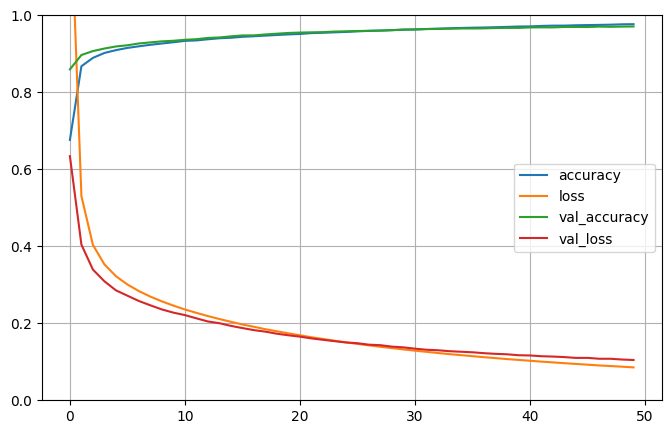

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [49]:
results = model.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.1056


[0.09029030054807663, 0.9722999930381775]

C:\Users\hegoi\AppData\Local\Temp\ipykernel_14932\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


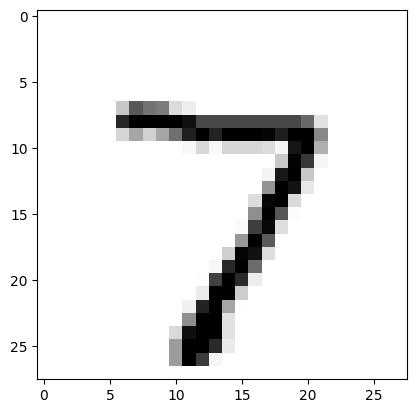

In [50]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [51]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [52]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
(1, 10)


array([[7.2413804e-06, 4.1408219e-07, 6.1154593e-04, 2.6652489e-03,
        1.6014248e-07, 4.1870785e-06, 9.5059605e-10, 9.9634212e-01,
        2.6965152e-05, 3.4207295e-04]], dtype=float32)

In [53]:
predictions.argmax()

np.int64(7)

In [54]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step


array([7, 2, 1, ..., 4, 5, 6])

C:\Users\hegoi\AppData\Local\Temp\ipykernel_14932\4029188365.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


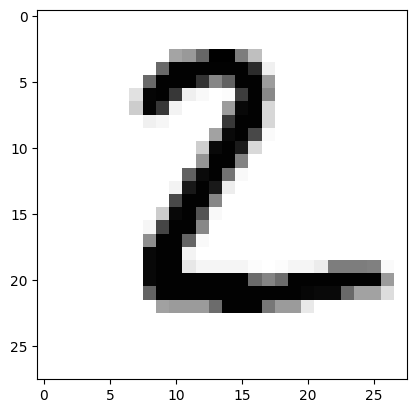

In [55]:
plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


array([[ 961,    0,    1,    1,    1,    3,    4,    2,    4,    3],
       [   0, 1120,    3,    1,    0,    2,    3,    1,    5,    0],
       [   4,    1, 1008,    4,    2,    0,    1,    4,    8,    0],
       [   0,    0,    3,  986,    0,    6,    0,    4,    9,    2],
       [   0,    0,    5,    1,  955,    0,    3,    2,    1,   15],
       [   5,    0,    0,    7,    1,  862,    8,    0,    7,    2],
       [   5,    3,    2,    1,    5,    7,  930,    0,    5,    0],
       [   1,    6,   10,    5,    1,    0,    0,  992,    2,   11],
       [   3,    0,    4,    8,    4,    5,    3,    2,  941,    4],
       [   4,    6,    0,    8,   10,    2,    1,    4,    6,  968]])

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [57]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [58]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [59]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [60]:
11610/32

362.8125

In [61]:
X_train.shape

(11610, 8)

In [62]:
X_train.shape[1:]

(8,)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 46s 130ms/step - loss: 5.0724

C:\Users\hegoi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2582 - val_loss: 0.5785
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5369 - val_loss: 0.5030
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4788 - val_loss: 0.4809
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4674 - val_loss: 0.4658
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4507 - val_loss: 0.4531
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4381 - val_loss: 0.4451
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4178 - val_loss: 0.4382
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4198 - val_loss: 0.4358
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4166 - val_loss: 0.4264
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4185 - val_loss: 0.4230
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4130 - val_loss: 0.4160
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

In [64]:
8*30 + 30

270

In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
8*30+30

270

In [67]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.3844
0.3880153298377991


In [68]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[3.8546662],
       [1.367077 ],
       [4.3683014],
       [3.0063248],
       [2.3033946]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [69]:
model.save("my_keras_model.keras")

In [70]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.3824
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.3760
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.3684
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3700
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.3598
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.3653
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3595
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3612
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.3476
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.3646
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.3522
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.3527
Epoch 13/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.4235
Epoch 14/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3495
Epoch 15/30
363/363 ━━━━━━━━━

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [72]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3281 - val_loss: 0.3592
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3308 - val_loss: 0.3571
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3459 - val_loss: 0.3586
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3797 - val_loss: 0.3573
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3334 - val_loss: 0.3773
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3400 - val_loss: 0.3556
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3352 - val_loss: 0.3525
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3596 - val_loss: 0.3541
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3196 - val_loss: 0.3600
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3287 - val_loss: 0.3496
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3287 - val_loss: 0.3500
Epoch 12/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

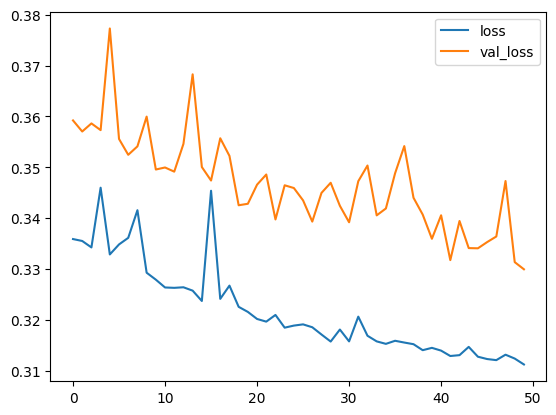

In [73]:
history_df = pd.DataFrame(history.history).plot()